In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dforders= pd.read_csv("orders.csv")
dfprod= pd.read_csv("products.csv")
dfdept= pd.read_csv("departments.csv")
dfaisle= pd.read_csv("aisles.csv")
dfprior= pd.read_csv("order_products__prior.csv")

In [3]:
dforders.info()
dforders.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

order_id- Primary key here. Each row represents a different order. No duplicates. Matches with prior dataset                 
user_id- which customer bought the order
eval_set- Is it prior, training or testing data
order_number- Order sequence 
order_dow- 7 Days of the week( 0 reprenting Sunday to 6 representing Saturday)
order_hour_of_day- 24 Hours in the day (0 representing 12 am to 23 hours representing 11pm)     
days_since_prior_order- no. of days since prev. order was made

ORDERS datasets requires some modifications. We will have to change the eval_set to category. We will also look at the ranges of the columns. We will also find any NA values.

In [4]:
dforders['eval_set']=dforders['eval_set'].astype('category')
#dforders['eval_set'].cat.categories
#dforders['eval_set'].unique()

dforders['days_since_prior_order'].unique()
dforders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

We found that there are 206209 NA values for days_since_prior_order. We will replace them with 0.

In [5]:
dforders['days_since_prior_order']=dforders['days_since_prior_order'].fillna(0)
dforders.head()
dforders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [6]:
#sns.set_style('darkgrid')
#plt.figure(figsize = (15,8))
#fg=sns.countplot(data= dforders, x=dforders['eval_set'], palette='Blues_r')
#plt.ticklabel_format(style='plain', axis='y')

#n_rows=4
#n_cols=2
#fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
#for i, column in enumerate(dforders.columns):
#    sns.histplot(dforders[column],ax=axes[i//n_cols,i%n_cols])

# General trends in orders

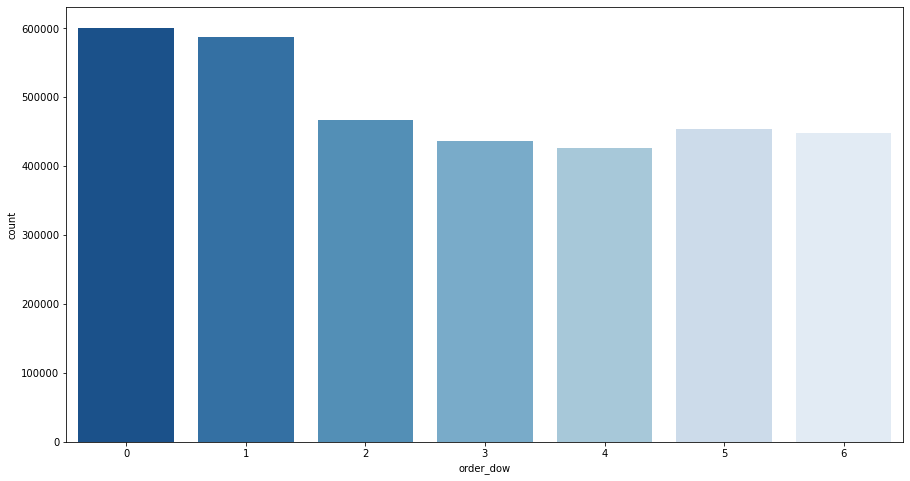

In [7]:
plt.figure(figsize = (15,8))
sns.countplot(data= dforders, x=dforders['order_dow'], palette='Blues_r')
plt.ticklabel_format(style='plain', axis='y')

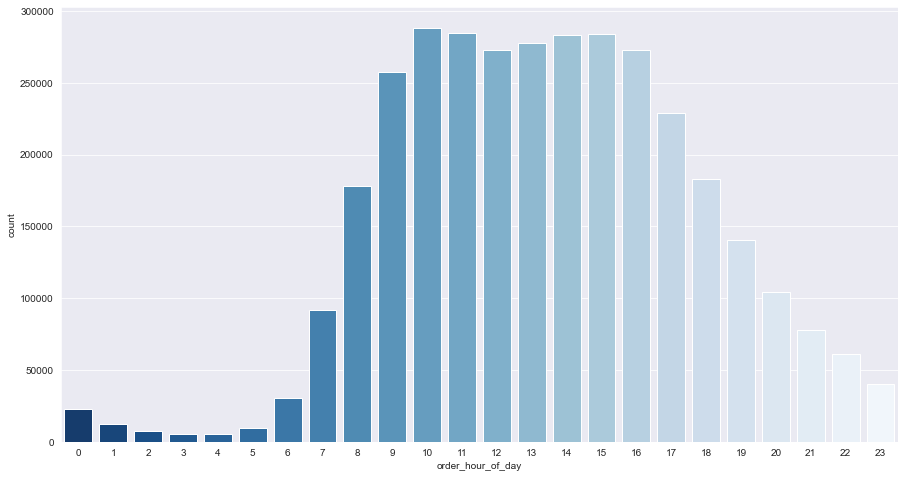

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,8))
sns.countplot(data= dforders, x=dforders['order_hour_of_day'], palette='Blues_r')
plt.ticklabel_format(style='plain', axis='y')

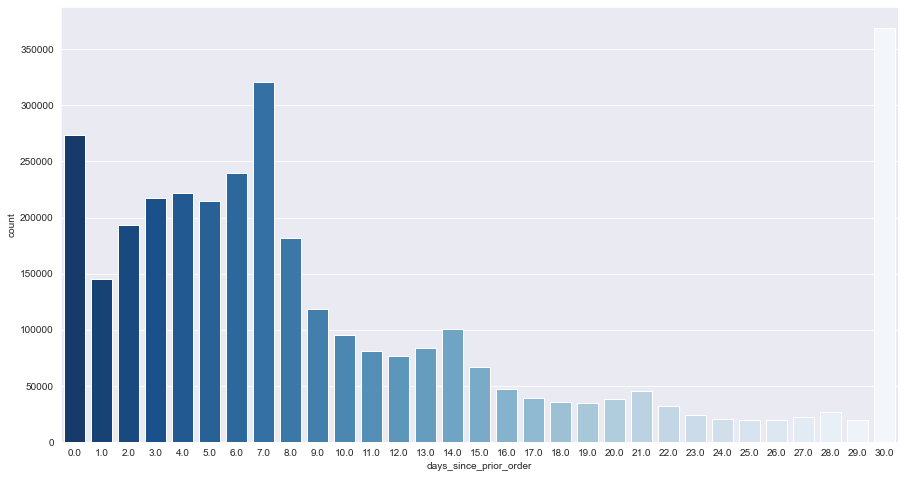

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,8))
sns.countplot(data= dforders, x=dforders['days_since_prior_order'], palette='Blues_r')
plt.ticklabel_format(style='plain', axis='y')

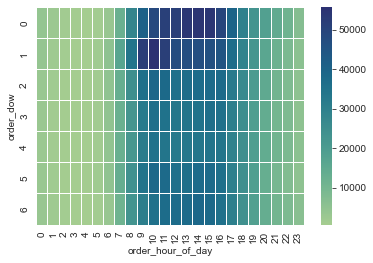

In [10]:
orderheatmap = dforders.groupby(['order_dow', 'order_hour_of_day'])['order_id'].agg('count').reset_index().rename(columns={'order_id':'orders_count'})
heatmap_data = orderheatmap.pivot('order_dow', 'order_hour_of_day', 'orders_count')
ax = sns.heatmap(data=heatmap_data, cmap="crest", linewidths=1)
plt.show()

From exploring the orders dataset, we can infer the following:
1. Days 0 and 1 were the favourite days for placing orders
2. The most avtivity were seen to be between 10am and 3pm
2. Most of the orders were placed on Day 0 between 1pm and 3pm and Day 1 between 9am and 11am
3. For most of the users, it has been over 30 days since their previous order

In [11]:
dfaisle['aisle']=dfaisle['aisle'].astype('category')
dfdept['department']=dfdept['department'].astype('category')
dfprod['product_name']=dfprod['product_name'].astype('category')

In [12]:
newdfpriorsample=pd.merge(dfprior, dforders, on = "order_id", how = "left")
newdfpriorsample= pd.merge(newdfpriorsample, dfprod, on = "product_id", how = "left")
newdfpriorsample=pd.merge(newdfpriorsample, dfaisle, on = "aisle_id", how = "left")
newdfpriorsample= pd.merge(newdfpriorsample, dfdept, on = "department_id", how = "left")
newdfpriorsample.info()
newdfpriorsample.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   add_to_cart_order       int64   
 3   reordered               int64   
 4   user_id                 int64   
 5   eval_set                category
 6   order_number            int64   
 7   order_dow               int64   
 8   order_hour_of_day       int64   
 9   days_since_prior_order  float64 
 10  product_name            category
 11  aisle_id                int64   
 12  department_id           int64   
 13  aisle                   category
 14  department              category
dtypes: category(4), float64(1), int64(10)
memory usage: 3.1 GB


order_id                  3214874
product_id                  49677
add_to_cart_order             145
reordered                       2
user_id                    206209
eval_set                        1
order_number                   99
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
product_name                49677
aisle_id                      134
department_id                  21
aisle                         134
department                     21
dtype: int64

# Favourite products, departments and aisles

In [13]:
newdfpriorsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   add_to_cart_order       int64   
 3   reordered               int64   
 4   user_id                 int64   
 5   eval_set                category
 6   order_number            int64   
 7   order_dow               int64   
 8   order_hour_of_day       int64   
 9   days_since_prior_order  float64 
 10  product_name            category
 11  aisle_id                int64   
 12  department_id           int64   
 13  aisle                   category
 14  department              category
dtypes: category(4), float64(1), int64(10)
memory usage: 3.1 GB


Find Top 10 Products

In [14]:
#print(newdfpriorsample.groupby('product_name')['order_id'].agg('count').nlargest(10))
#topproducts= newdfpriorsample.groupby('product_name')['order_id'].agg('count').nlargest(10)
#newdfpriorsample[topproducts]
#topproducts= newdfpriorsample.groupby('product_name')['order_id'].count().nlargest(10)
#topprod=productcount.head(10)
#topprod

In [15]:
total_orders = newdfpriorsample['order_id'].nunique()
total_orders
productcount= newdfpriorsample.groupby('product_name')['order_id'].count().reset_index()
productcount['countoforders'] = productcount['order_id']
productcount.drop(['order_id'], axis=1, inplace=True)
productcount['percentcount']= (productcount['countoforders']/total_orders)*100
productcount=productcount.sort_values(by=['countoforders'], ascending=False)

In [16]:
#productcount=productcount.head(10)

<AxesSubplot:xlabel='product_name'>

<Figure size 1080x576 with 0 Axes>

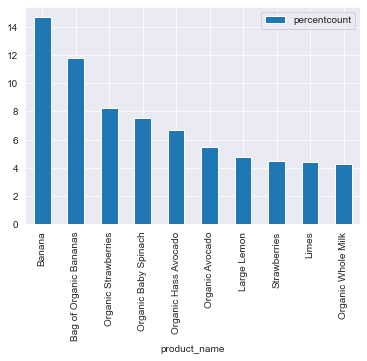

In [17]:
plt.figure(figsize = (15,8))
productcount.iloc[:10].plot.bar(x='product_name', y='percentcount')

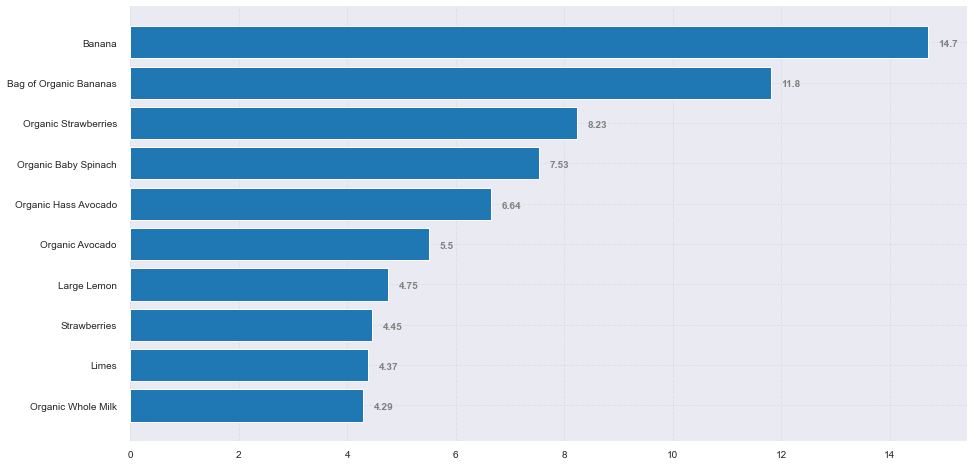

In [18]:
product_name = productcount['product_name'].head(10)
product_percent = productcount['percentcount'].head(10)
 
# Figure Size
fig, ax = plt.subplots(figsize =(15, 8))
 
# Horizontal Bar Plot
ax.barh(product_name, product_percent)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Text watermark
#fig.text(0.9, 0.15, 'RishavGhosh', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
 #        alpha = 0.7)
 
# Show Plot
plt.show()

We can see the top 10 products in the bar chart plotted. Bananas accounted for over 25% of the total orders! Most of the top 10 items were found to be fresh produce. Let us see which department they belong in.

Top 10 aisles

In [19]:
aislecount= newdfpriorsample.groupby('aisle')['product_id'].count().reset_index()
aislecount.rename(columns = {'product_id':'countorder'}, inplace = True)
aislecount= aislecount.sort_values(by='countorder', ascending=False)
aislecount.head()

,aisle,countorder
50,fresh fruits,3642188
53,fresh vegetables,3418021
98,packaged vegetables fruits,1765313
133,yogurt,1452343
93,packaged cheese,979763


In [20]:
aislecount['percentcount']= (aislecount['countorder']/aislecount['countorder'].sum())*100
aislecount.head()

,aisle,countorder,percentcount
50,fresh fruits,3642188,11.229368
53,fresh vegetables,3418021,10.538230
98,packaged vegetables fruits,1765313,5.442703
133,yogurt,1452343,4.477774
93,packaged cheese,979763,3.020744


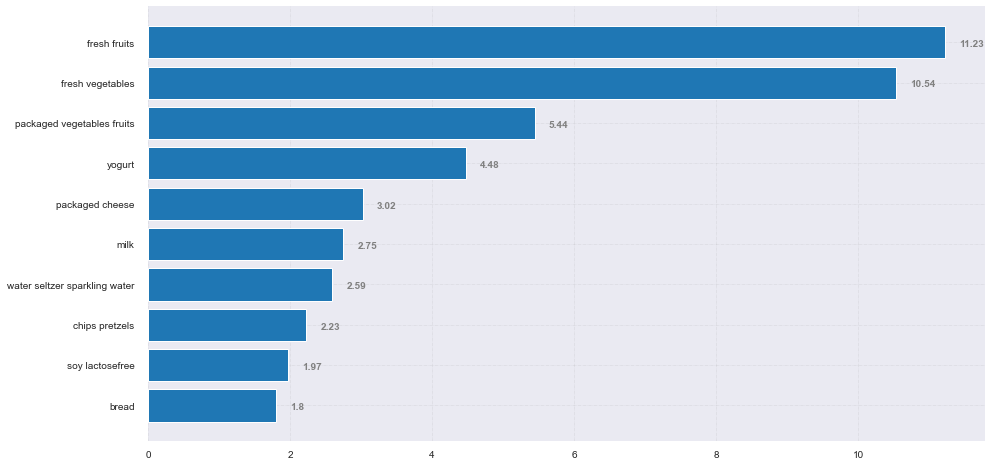

In [21]:
aisle_name = aislecount['aisle'].head(10)
aisle_percent = aislecount['percentcount'].head(10)
 
# Figure Size
fig, ax = plt.subplots(figsize =(15, 8))
 
# Horizontal Bar Plot
ax.barh(aisle_name, aisle_percent)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Text watermark
#fig.text(0.9, 0.15, 'RishavGhosh', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
 #        alpha = 0.7)
 
# Show Plot
plt.show()

We were correct in our initial assessment that produce were the most ordered items. As we can see from the aisle chart, the top 3 aisles were produces, comprising of fruits and vegetables and accounting for over 25% of the total orders.

In [22]:
deptcount= newdfpriorsample.groupby('department')['product_id'].count().reset_index()
deptcount.rename(columns = {'product_id':'countorder'}, inplace = True)
deptcount= deptcount.sort_values(by='countorder', ascending=False)
deptcount.head()

,department,countorder
19,produce,9479291
7,dairy eggs,5414016
20,snacks,2887550
3,beverages,2690129
10,frozen,2236432


In [23]:
deptcount['percentcount']= (deptcount['countorder']/deptcount['countorder'].sum())*100

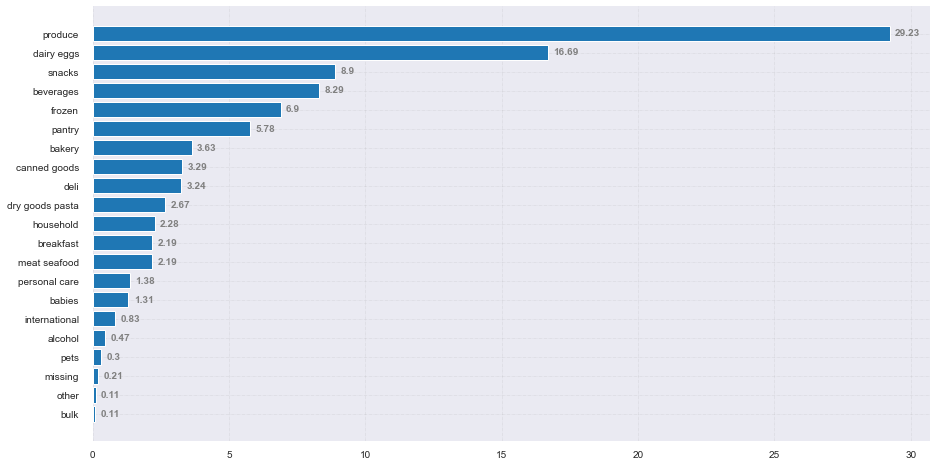

In [24]:
dept_name = deptcount['department']
dept_percent = deptcount['percentcount']
 
# Figure Size
fig, ax = plt.subplots(figsize =(15, 8))
 
# Horizontal Bar Plot
ax.barh(dept_name, dept_percent)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Text watermark
#fig.text(0.9, 0.15, 'RishavGhosh', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
 #        alpha = 0.7)
 
# Show Plot
plt.show()

# Trends in reordered items

In [25]:
dfprior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [26]:
dfprior['reordered'].value_counts(normalize=True)

1    0.589697
0    0.410303
Name: reordered, dtype: float64

[Text(0, 0, 'first-time ordered products'), Text(1, 0, 'reordered')]

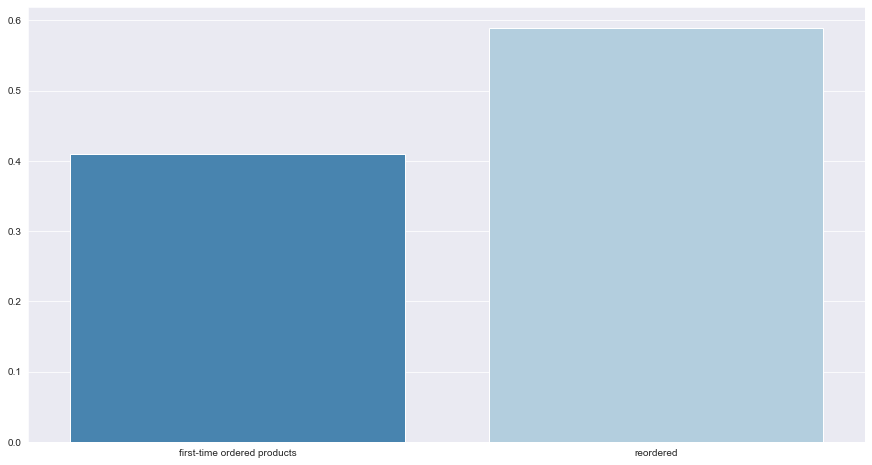

In [27]:
total_prod_count=dfprior.shape[0]
reorder_ratio = dfprior['reordered'].value_counts()/total_prod_count
reorder_ratio
plt.figure(figsize = (15,8))
ax = sns.barplot(x=reorder_ratio.index, y=reorder_ratio.values, palette='Blues_r')
ax.set_xticklabels(['first-time ordered products', 'reordered'])

In [28]:
propreorder = newdfpriorsample.groupby(['department'])['reordered'].aggregate("mean").reset_index()
propreorderh= propreorder.sort_values(by='reordered', ascending= False).head(10)
orderedh=propreorderh.set_index('department', drop=True).index.values

In [29]:
propreorderl= propreorder.sort_values(by='reordered', ascending= True).head(10)
orderedl=propreorderl.set_index('department', drop=True).index.values

In [30]:
#propreorderh.iloc[:10].plot.bar(x='department', y='reordered')

In [31]:
#fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#fig.suptitle('Departmental trends in Reordered items')

# Highest
#g=sns.barplot(ax=axes[0],x='department', y='reordered', data=propreorderh[:10], order=orderedh, palette = 'Blues_r')
#g.set_xticklabels(orderedh, rotation=90)

# Lowest
#g2=sns.barplot(ax=axes[1],x='department', y='reordered', data=propreorderl[:10], order=orderedl, palette = 'Blues_r')
#g2.set_xticklabels(orderedl, rotation=90)

#sns.despine(trim=False)

In [32]:
propreordera = newdfpriorsample.groupby(['aisle'])['reordered'].aggregate("mean").reset_index()
propreorderah= propreordera.sort_values(by='reordered', ascending= False).head(10)
orderedah=propreorderah.set_index('aisle', drop=True).index.values
propreorderal= propreordera.sort_values(by='reordered', ascending= True).head(10)
orderedal=propreorderal.set_index('aisle', drop=True).index.values

In [33]:
propreorderp = newdfpriorsample.groupby(['product_name'])['reordered'].aggregate("mean").reset_index()
propreorderph= propreorderp.sort_values(by='reordered', ascending= False).head(10)
orderedph=propreorderph.set_index('product_name', drop=True).index.values
propreorderpl= propreorderp.sort_values(by='reordered', ascending= True).head(10)
orderedpl=propreorderpl.set_index('product_name', drop=True).index.values

In [34]:
orderedpl

['Soap, Pure-Castile, 18-in-1 Hemp, Citrus Orange', 'Sterile Gauze Pads', 'Sterile Multi-Purpose Solution for Soft Conta..., 'Stevia', 'Double Top *2X Total Meat Toppings As Our Ori..., 'Stewed Roma Style W/Onions Celery & Green Pep..., 'Double Sided Dark Chocolate Sea Salt Cookies', 'Stir Fry Cut Baby Corn', 'Double Control Small Roach Baits Insecticide', 'Double Control Large Roach Baits Insecticide']
Categories (49688, object): ['#2 Coffee Filters', '#2 Cone White Coffee Filters', '#2 Mechanical Pencils', '#4 Natural Brown Coffee Filters', ..., 'with Xylitol Unwrapped Spearmint 50 Sticks Su..., 'with Xylitol Watermelon Twist 18 Sticks Sugar..., 'with a Splash of Mango Coconut Water', 'with a Splash of Pineapple Coconut Water']

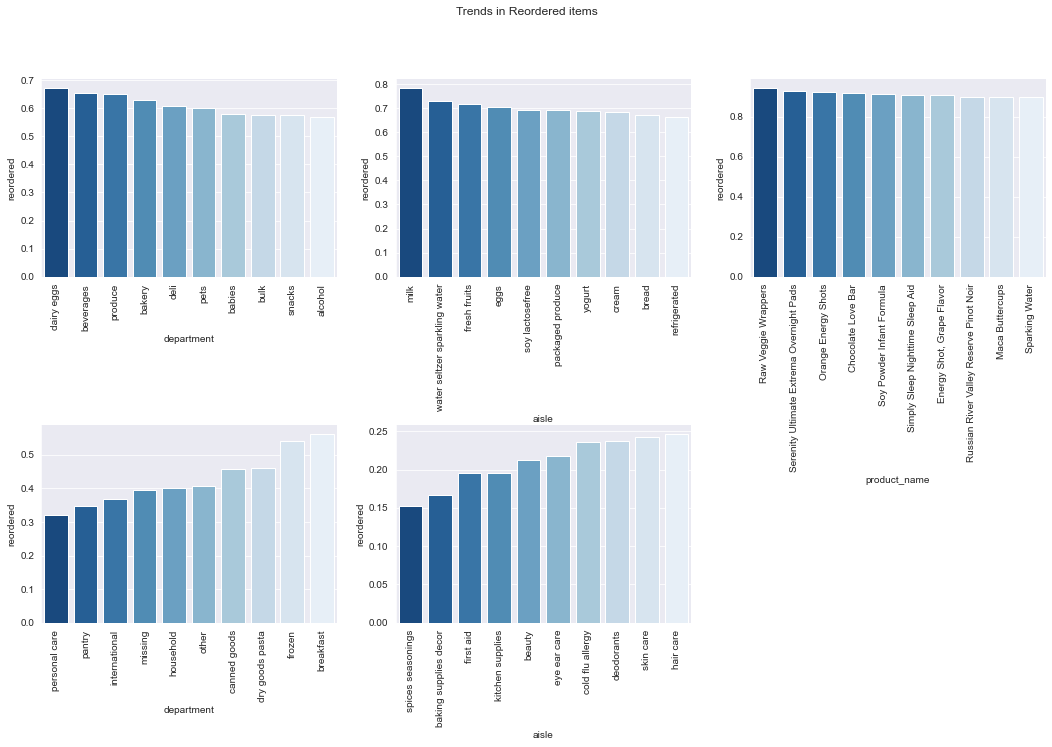

In [35]:
fig, axes = plt.subplots(2, 3, figsize= (18,10))
fig.suptitle('Trends in Reordered items')
#fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.75)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Highest dept
dh=sns.barplot(ax=axes[0,0],x='department', y='reordered', data=propreorderh[:10], order=orderedh, palette = 'Blues_r')
dh.set_xticklabels(orderedh, rotation=90)

# Lowest dept
dl=sns.barplot(ax=axes[1,0],x='department', y='reordered', data=propreorderl[:10], order=orderedl, palette = 'Blues_r')
dl.set_xticklabels(orderedl, rotation=90)

# Highest aisle
ah=sns.barplot(ax=axes[0,1],x='aisle', y='reordered', data=propreorderah[:10], order=orderedah, palette = 'Blues_r')
ah.set_xticklabels(orderedah, rotation=90)

# Lowest aisle
al=sns.barplot(ax=axes[1,1],x='aisle', y='reordered', data=propreorderal[:10], order=orderedal, palette = 'Blues_r')
al.set_xticklabels(orderedal, rotation=90)

# Highest product
ph=sns.barplot(ax=axes[0,2],x='product_name', y='reordered', data=propreorderph[:10], order=orderedph, palette = 'Blues_r')
ph.set_xticklabels(orderedph, rotation=90)

# Lowest product
#pl=sns.barplot(ax=axes[1,2],x='product_name', y='reordered', data=propreorderpl[:10], order=orderedpl, palette = 'Blues_r')
#pl.set_xticklabels(orderedpl, rotation=90)

fig.delaxes(axes[1,2]) #The indexing is zero-based here

sns.despine(trim=False)

Eggs, beverages and produce were among the highest in terms of reordered proportion. That means that eggs have a 64% chance of being reordered. Personal care, pantry and international items were among the lowest reordered.

The products with the lowest proportions was not plotted as they were all near zero. Some of the lowest were as follows:
1. Soap, Pure-Castile, 18-in-1 Hemp, Citrus Orange
2. Sterile Gauze Pads
3. Sterile Multi-Purpose Solution for Soft Contacts

These were again all from the personal care department, which we already saw to be among the lowest reordered items

# Predictive Model

Set the training dataset

In [36]:
dftrain= pd.read_csv("order_products__train.csv")
dforders= pd.read_csv("orders.csv")
dfprod= pd.read_csv("products.csv")
#dfdept= pd.read_csv("departments.csv")
#dfaisle= pd.read_csv("aisles.csv")

In [37]:
dftrain= pd.merge(dftrain, dfprod, on='product_id', how='left')

In [38]:
dftrain.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15


In [39]:
dftrain=pd.merge(dftrain, dfaisle, on = 'aisle_id', how='left')

In [40]:
dftrain=pd.merge(dftrain, dfdept, on= 'department_id', how='left')

In [41]:
dftrain=pd.merge(dftrain, dforders, on= 'order_id', how= 'left')

Feature Selection: Select a subset of input features from the dataset.
    Unsupervised: Do not use the target variable (e.g. remove redundant variables).
            -Correlation
    Supervised: Use the target variable (e.g. remove irrelevant variables).
        Wrapper: Search for well-performing subsets of features.
            -RFE
        Filter: Select subsets of features based on their relationship with the target.
            -Statistical Methods
            -Feature Importance Methods
        Intrinsic: Algorithms that perform automatic feature selection during training.
            -Decision Trees
Dimensionality Reduction: Project input data into a lower-dimensional feature space.

i. Backward Elimination
As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

This seems like a classigication problem. We need to classify the reordered feature based on other criteria

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
dftrain.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [44]:
dftrain.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0


In [45]:
dftrain.nunique()

order_id                  131209
product_id                 39123
add_to_cart_order             80
reordered                      2
product_name               39123
aisle_id                     134
department_id                 21
aisle                        134
department                    21
user_id                   131209
eval_set                       1
order_number                  97
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
dtype: int64

We drop order_ID, user_ID, eval_set,product_name, order_number from the model

In [46]:
col_names=['add_to_cart_order', 'product_id','aisle_id', 'department_id', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order']
X = dftrain[col_names] # Features
y = dftrain.reordered # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [47]:
X.nunique()

add_to_cart_order            80
product_id                39123
aisle_id                    134
department_id                21
order_dow                     7
order_hour_of_day            24
days_since_prior_order       31
dtype: int64

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
clf.get_params()
predict_model= clf.predict(X_test)

In [49]:
accuracy_score(y_test,predict_model)

0.5765817817644312

The model predicts reordered items with 57% accuracy. We will see which features were the best

In [50]:
confusion_matrix(y_test, predict_model,labels= [0,1])

array([[ 81113,  85594],
       [ 90288, 158391]], dtype=int64)

In [51]:
feature1= X.columns
class1= list(y.unique())
class1= [str(x) for x in class1]   #the plot takes in string class values
val= clf.feature_importances_
feature_imp= pd.DataFrame(val, index= feature1).sort_values(0,ascending = False)
feature_imp

,0
product_id,0.287662
order_hour_of_day,0.202871
days_since_prior_order,0.143035
add_to_cart_order,0.138080
order_dow,0.130287
aisle_id,0.055452
department_id,0.042612


We can see 5 features as being the most impactful here. We will create another model with max depth of 5

In [52]:
clf5= DecisionTreeClassifier(max_depth = 3)
clf5=clf5.fit(X_train,y_train)
predict_model= clf5.predict(X_test)

In [53]:
accuracy_score(y_test,predict_model)

0.628774200382295

In [54]:
feature2= X.columns
class2= list(y.unique())
class1= [str(x) for x in class1]   #the plot takes in string class values
val= clf5.feature_importances_
feature_imp= pd.DataFrame(val, index= feature2).sort_values(0,ascending = False)
feature_imp

,0
days_since_prior_order,0.504349
add_to_cart_order,0.394639
department_id,0.101012
product_id,0.000000
aisle_id,0.000000
order_dow,0.000000
order_hour_of_day,0.000000


However we see that only 3 had significant importance in predicting the score. Therefore, we plot with max depth of 3

[Text(0.5, 0.875, 'days_since_prior_order <= 29.5\ngini = 0.481\nsamples = 969231\nvalue = [389086, 580145]\nclass = 0'),
 Text(0.25, 0.625, 'add_to_cart_order <= 5.5\ngini = 0.455\nsamples = 683771\nvalue = [239795, 443976]\nclass = 0'),
 Text(0.125, 0.375, 'department_id <= 7.5\ngini = 0.402\nsamples = 285575\nvalue = [79452, 206123]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.36\nsamples = 150760\nvalue = [35469, 115291]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.44\nsamples = 134815\nvalue = [43983, 90832]\nclass = 0'),
 Text(0.375, 0.375, 'department_id <= 4.5\ngini = 0.481\nsamples = 398196\nvalue = [160343, 237853]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.458\nsamples = 162717\nvalue = [57872, 104845]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.492\nsamples = 235479\nvalue = [102471, 133008]\nclass = 0'),
 Text(0.75, 0.625, 'add_to_cart_order <= 5.5\ngini = 0.499\nsamples = 285460\nvalue = [149291, 136169]\nclass = 1'),
 Text(0.625, 0.375, 'add_to_cart_order <= 2.5\ngini

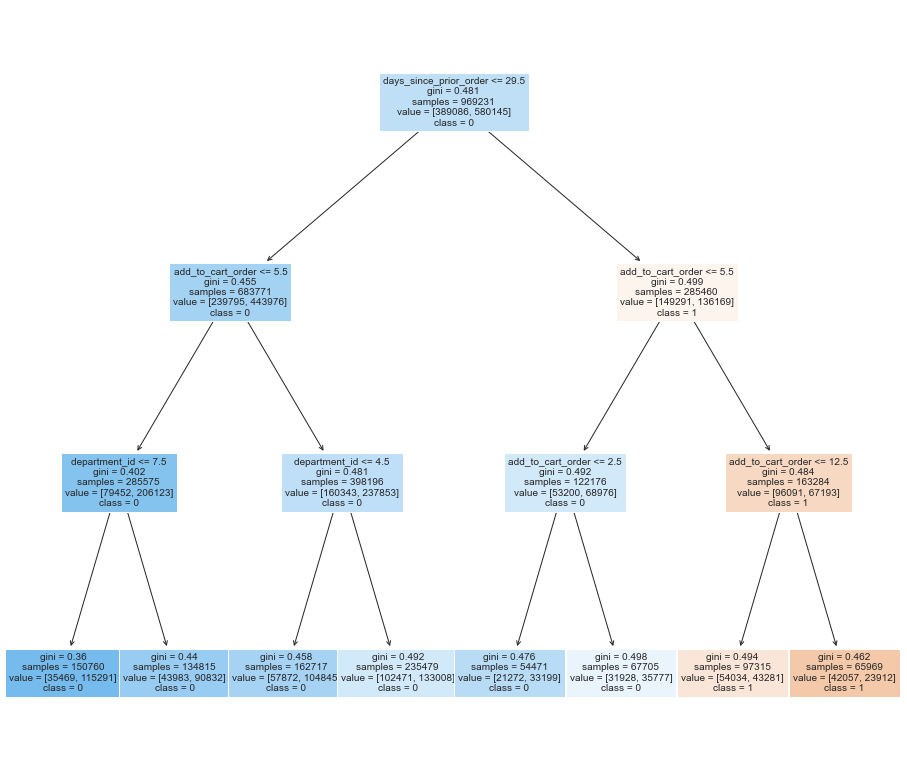

In [55]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(16,14))
tree.plot_tree(clf5,max_depth = 3, feature_names=feature1, class_names=class1, label='all', fontsize=10, filled = True)

The model predicts with an accuracy of 62.8%. days since prior order, orders added to cart and department were the significant indicators for prediction